<img src="ku_logo_uk_v.png" alt="drawing" width="130" style="float:right"/>

# <span style="color:#2c061f"> Exercise 4 </span>  

<br>

## <span style="color:#374045"> Introduction to Programming and Numerical Analysis </span>


####  <span style="color:#d89216"> <br> Sebastian Honoré </span>

## Plan for today
<br>

1. Welcome
2. Plotting
3. Optimization
4. Problemset 1

## 2. Plotting

There exist numerous different modules for plotting in Python. In this course we will work mainly with two of them. The first is the classic tool, `matplotlib`. The second tool is `seaborn` which is a newer module that allows to produce figures with less effort. 

Lets try it out:

## 2.1 import libraries

In [35]:
import matplotlib.pyplot as plt
from matplotlib import cm # for colormaps
import numpy as np
import seaborn as sns
#Center images in notebook (optional)
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## 2.1. Define function to plot

In [36]:
def f(x):
    """
    Defines an equation.
    
    Args:
    x (list): list of variable arrays
    
    Returns:
    eq_1 (scalar): Function value
    """
    if len(x)==0: 
        raise ValueError ("No variables defined")
    elif len(x)==1: # to ensure input is valid - in this case only 1 allowed
        eq_1 = np.sin(x[0])+0.05*x[0]**2 
        return eq_1
    elif len(x)==2: # to ensure input is valid - in this case only 2 variables allowed
        eq_1 = np.sin(x[0])+0.05*x[1]**2 
        return eq_1
    elif len(x)>2: 
        raise ValueError ("Too many variables defined")

## 2.2 Generate data

In [37]:
N=100
x1_vec = np.linspace(-10,10,N) # draw N=100 evenly spaced numbers between -10 and 10
x2_vec = np.linspace(-10,10,N)

x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij') # create coordinate matrix
x = ([x1_grid,x2_grid]) #because function takes a list of arrays
f_grid = f(x)

## 2.3 Plot function values - 3-dimensional

Text(0.5, 0, '$f(x_1,x_2)$')

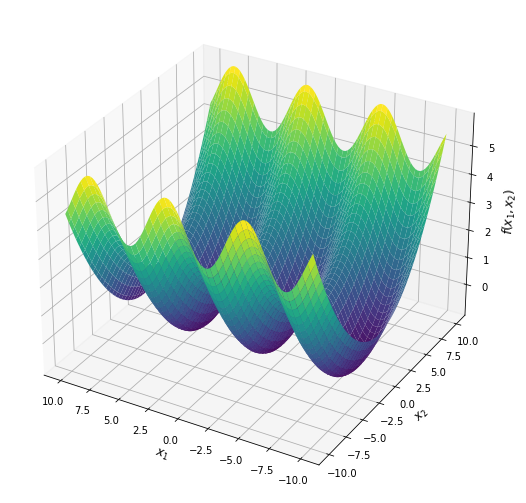

In [27]:
fig = plt.figure(figsize=(9,9)) # define figure object and size in general 13/9
ax = fig.add_subplot(111, projection='3d') # define subplot and projection
ax.plot_surface(x1_grid,x2_grid,f_grid,cmap=cm.viridis) # plot 3d surface and colormap
ax.invert_xaxis()
ax.set_xlabel('$x_1$',fontsize=12) # set labels and fontsize
ax.set_ylabel('$x_2$',fontsize=12)
ax.set_zlabel('$f(x_1,x_2)$',fontsize=12)
#ax.set_title("Cool 3d-graph",fontsize=14)

## 2.4 2-dimensional function

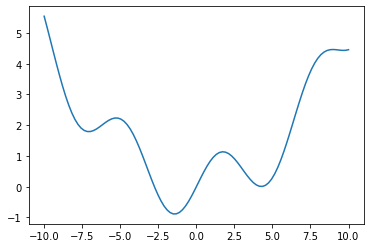

In [29]:
fig2 = plt.figure() # define new figure object
ax = fig2.add_subplot(111) # add subplot
ax.plot(x1_vec,f([x1_vec])) # plot function value for first instance in y_grid

## 2.4 2-dimensional function - grammar of graphics
Now lets turn to how to construct a nice figure. I will follow the [_grammar of graphics_](http://vita.had.co.nz/papers/layered-grammar.pdf) framework. Things to keep in mind:

1. Keep it simple!
  - Anything unnecessary should be removed, see [this post](https://www.darkhorseanalytics.com/blog/data-looks-better-naked/).
  
2. Self explanatory
  - Contain axis label, title, footnotes in text containing relevant information.
3. Nice appereance 
  - Choose the right plot type.
  - Make sure font type and size match. Beware of colors and line width.

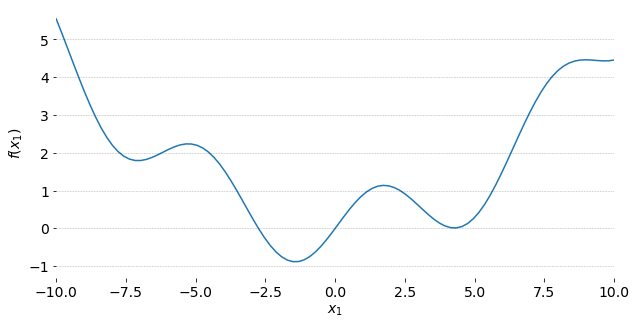

In [16]:
fig3 = plt.figure(figsize=(10,5)) # define new figure object
ax = fig3.add_subplot(111) # add subplot
ax.plot(x1_vec,f([x1_vec])) # plot 2-dimensional function

#add lines
for y in range(-1, 6):    
    plt.plot(range(-10,11), [y] * len(range(-10, 11)), "--", lw=0.5, color="black", alpha=0.3)
    
ax.xaxis.label.set_fontsize(14) #set label fontsize to 14
ax.yaxis.label.set_fontsize(14)
ax.set(xlabel="$x_1$", ylabel = "$f(x_1)$",xlim = ([-10,10])) #set xlabel,ylabel and xlimit
for item in ax.get_yticklabels()+ax.get_xticklabels(): # set ticklabels to fontsize 14
    item.set_fontsize(14)

#remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

## 3.1 Optimization

Let's try to find the global optimum of the 3d function. How can we do this? 
- We can loop through solutions and return optimum 
    - Cumbersome and not guaranteed to yield optimum
- Or we can use Scipy's optimization module
    - We use scipy.optimize.minimize_scalar when we only optimize one argument 
    - For multidimensional functions we use scipy.optimize.minimize
    
    - **Note:** We use minimize even though we solve a maximization problem - just remember to subtract objective function! 

In [38]:
# a. using scipy optmize
from scipy import optimize

x_guess = (0,0) # optimizer needs a starting point for the two values     
obj = lambda x:f(x) #objective function to optimize - in this case minimize

#b.optimizing objective function 
res = optimize.minimize(obj,x_guess,method="Nelder-Mead") #Nelder-mead is standard and simple method
print("-----------")
print(res.message)
print("-----------")

#c.unpacking results
x1_best_scipy = res.x[0]
x2_best_scipy = res.x[1]
f_best_scipy = res.fun

# d. print
print(f'Using numerical solver the optimal values are:')
print(f'Function = {f_best_scipy.item():.4f};  x1 = {x1_best_scipy:.4f}; x2 = {x2_best_scipy:.4f}')

-----------
Optimization terminated successfully.
-----------
Using numerical solver the optimal values are:
Function = -1.0000;  x1 = -1.5708; x2 = -0.0000


<img src="nelder-mead.gif" style="float:right">

# <span style="color:#2c061f"> 3.2 Whats going on under the hood? </span>  


<br>
 <span style="color:#374045"> - Largely depends on the method used!  </span>

<span style="color:#374045"> - Nelder-Mead is a downhill method, whereas other algorithm use a lagrangian method to incoorporate constraints - e.g. consumer budget constraint </span>

<span style="color:#374045"> - Gif shows the Nelder-Mead method  </span>



<img src="2d.gif" style="float:right">

## <span style="color:#2c061f"> 3.3 Optimizing 2-dimensional function  </span> 
<br>
<span style="color:#2c061f"> Nelder-Mead in action. Red dot starts at the initial guess $x_1=0$ and quickly converges to the global minimum. </span> 

## <span style="color:#2c061f"> 3.3 bounded optimization  </span> 
<br>
<span style="color:#2c061f"> What if we know that the optimum lies within a given interval? For instance optimal consumption is bounded by individuals income. Lets turn to the 2d function for this.  </span> 

<br>
<br>
<span style="color:#2c061f"> - Lets try to find the optimum in the interval [-10,-2.5]  </span> 

In [39]:
#a. bounded optimizer
x_guess = 0 # optimizer needs a starting point 
bounds = (-10,-2.5) # interval optimum lies

    
obj = lambda x1_vec: f([x1_vec]) #objective function

#b.optimizing objective function 
res = optimize.minimize_scalar(obj,x_guess,method="bounded",bounds=bounds) #we use minimize_scalar here!
print("-----------")
print(res.message)
print("-----------")

#c.unpacking results
x1_best_scipy = res.x
f_best_scipy = res.fun

# d. print
print(f'Using numerical solver the optimal values are:')
print(f'Function = {f_best_scipy.item():.4f};  x1 = {x1_best_scipy:.4f}')

-----------
Solution found.
-----------
Using numerical solver the optimal values are:
Function = 1.7911;  x1 = -7.0689


## 3.4 Optimization tips and tricks

- what if we have a function that takes more than one argument and we only want to optimize one argument?
    - Specify `args` in optimizer and type in those arguments that should be held constant e.g. $\alpha, \beta,$ income, prices etc. 
    
- Usually constraints can be expressed such that you can avoid using multi-dimensional constrainted solvers
    - Consumer budget constraint with two goods can be rewritten such that $x_2$ is an implicit function of $x_1$. See lecture notebook section 7. 

## 4. Problemset 1

Thats it for me today. Your turn to work with optimization and plotting!  